## Appendix: Python codes and outputs

# Machine Learning Algorithms for COVID-19 cases Prediction

## Step 1: Import Python Libraries

In [3]:

#Loading required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Reading Dataset

In [4]:
ILIdata = pd.read_csv("Dataset_Group_3.csv")
ILIdata.head()

,Sex,Age,Cough,Temprature,Headache,Skin_rash,runny_nose,sorthroat,Hemoptysis,Breathing,Arthritis,Vomiting,Covid_19_result
0,Female,35.00,No,No,No,No,No,No,No,No,No,No,Negative
1,Female,55.00,Yes,Yes,Yes,No,No,No,No,Yes,No,No,Negative
2,Male,0.75,Yes,No,No,No,No,No,No,Yes,No,No,Positive
3,Male,30.00,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,Negative
4,Female,3.00,Yes,No,No,No,No,No,No,No,No,No,Positive


## Step 3: Analyzing the Data

## Explanatory Data Analysis

In [5]:
ILIdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              2001 non-null   object 
 1   Age              2001 non-null   float64
 2   Cough            2001 non-null   object 
 3   Temprature       2001 non-null   object 
 4   Headache         2001 non-null   object 
 5   Skin_rash        2001 non-null   object 
 6   runny_nose       2001 non-null   object 
 7   sorthroat        2001 non-null   object 
 8   Hemoptysis       2001 non-null   object 
 9   Breathing        2001 non-null   object 
 10  Arthritis        2001 non-null   object 
 11  Vomiting         2001 non-null   object 
 12  Covid_19_result  2001 non-null   object 
dtypes: float64(1), object(12)
memory usage: 203.4+ KB


### Check for Duplication

In [6]:
ILIdata.nunique()

Sex                  2
Age                164
Cough                2
Temprature           2
Headache             2
Skin_rash            2
runny_nose           2
sorthroat            2
Hemoptysis           2
Breathing            2
Arthritis            2
Vomiting             2
Covid_19_result      2
dtype: int64

### Missing Values Calculation

In [7]:
ILIdata.isnull().sum()

Sex                0
Age                0
Cough              0
Temprature         0
Headache           0
Skin_rash          0
runny_nose         0
sorthroat          0
Hemoptysis         0
Breathing          0
Arthritis          0
Vomiting           0
Covid_19_result    0
dtype: int64

In [8]:
# Value counts for categorical variables
categorical_vars = ['Sex', 'Cough', 'Temprature', 'Headache', 'Skin_rash', 'runny_nose', 
                    'sorthroat', 'Hemoptysis', 'Breathing', 'Arthritis', 'Vomiting', 'Covid_19_result']
for var in categorical_vars:
    print(f"\nValue Counts for {var}:")
    print(ILIdata[var].value_counts())


Value Counts for Sex:
Sex
Male      1094
Female     907
Name: count, dtype: int64

Value Counts for Cough:
Cough
Yes    1838
No      163
Name: count, dtype: int64

Value Counts for Temprature:
Temprature
No     1539
Yes     462
Name: count, dtype: int64

Value Counts for Headache:
Headache
No     1674
Yes     327
Name: count, dtype: int64

Value Counts for Skin_rash:
Skin_rash
No     1947
Yes      54
Name: count, dtype: int64

Value Counts for runny_nose:
runny_nose
No     1078
Yes     923
Name: count, dtype: int64

Value Counts for sorthroat:
sorthroat
No     1776
Yes     225
Name: count, dtype: int64

Value Counts for Hemoptysis:
Hemoptysis
No     1968
Yes      33
Name: count, dtype: int64

Value Counts for Breathing:
Breathing
Yes    1525
No      476
Name: count, dtype: int64

Value Counts for Arthritis:
Arthritis
No     1961
Yes      40
Name: count, dtype: int64

Value Counts for Vomiting:
Vomiting
No     1676
Yes     325
Name: count, dtype: int64

Value Counts for Covid_19_result

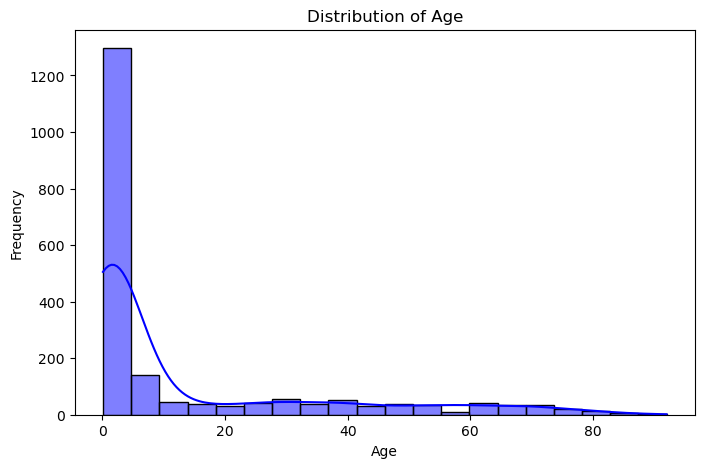

In [9]:
#Distribution of 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(ILIdata['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\abres\AppData\Local\Temp\ipykernel_7076\2809112775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ILIdata, x=var, palette='pastel')
C:\Users\abres\AppData\Local\Temp\ipykernel_7076\2809112775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ILIdata, x=var, palette='pastel')
C:\Users\abres\AppData\Local\Temp\ipykernel_7076\2809112775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ILIdata, x=var, palette='pastel')
C:\Users\abres\AppData\Local\Temp\ipykernel_7076\2809112775.py:5: FutureWarning: 

Passi

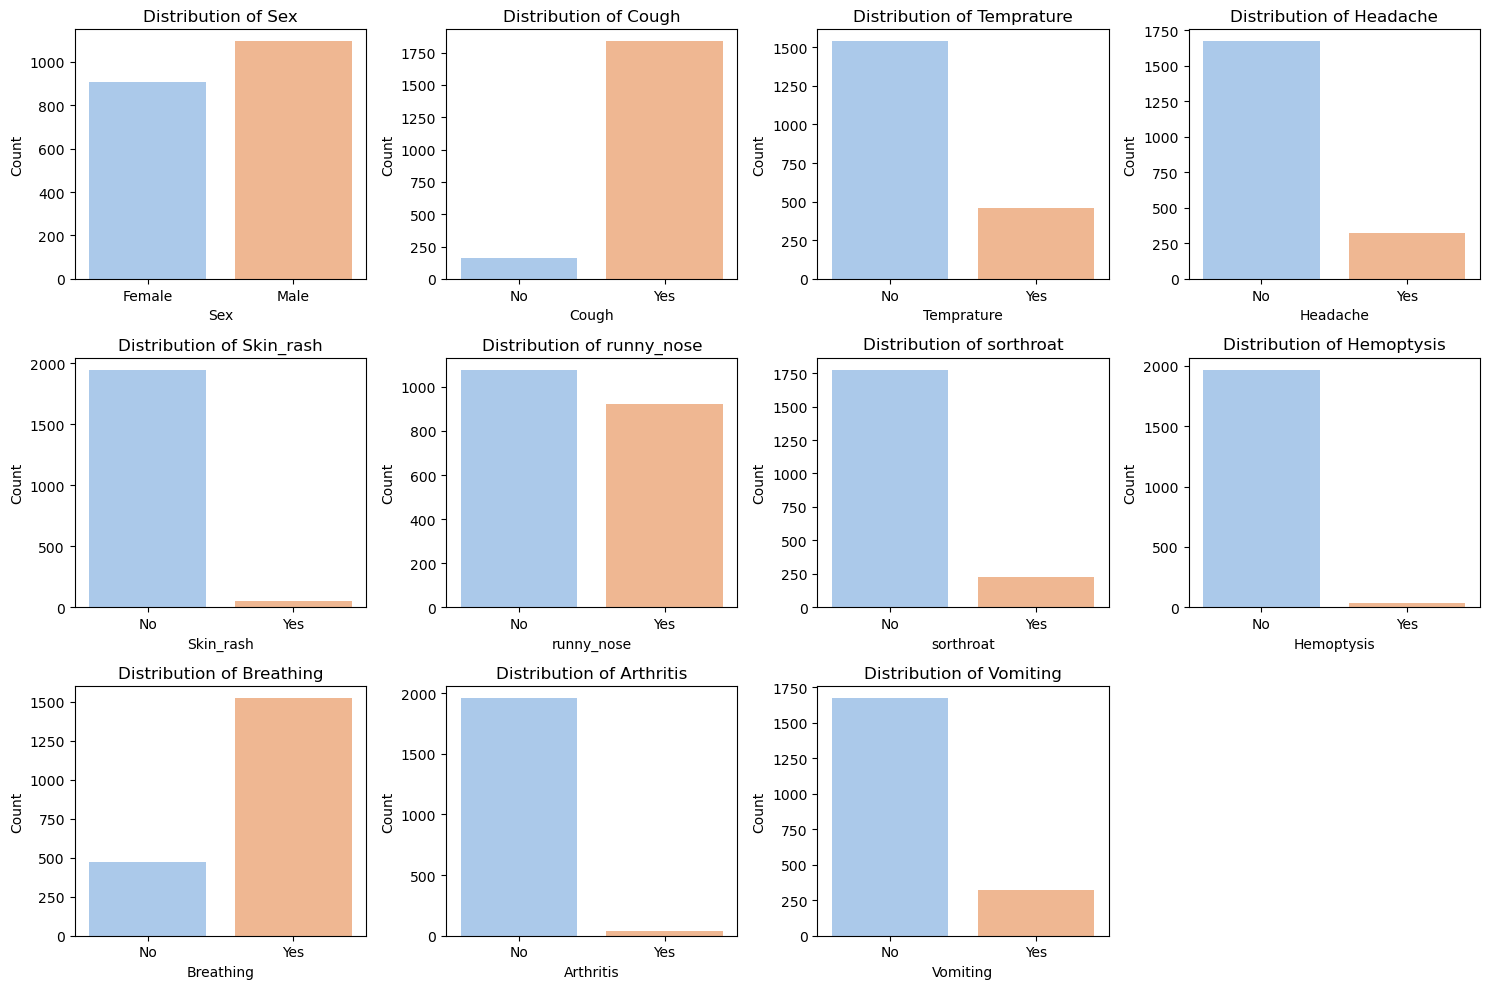

In [10]:
# Visualizing binary variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars[:-1]):  # Exclude 'Covid_19_result' for now
    plt.subplot(3, 4, i+1)
    sns.countplot(data=ILIdata, x=var, palette='pastel')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\abres\AppData\Local\Temp\ipykernel_7076\3149674665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ILIdata, x='Covid_19_result', palette='viridis')


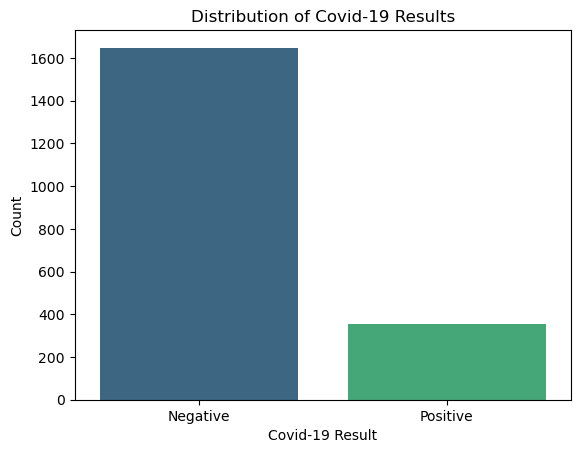

In [11]:
# 5. Analyzing 'Covid_19_result'
sns.countplot(data=ILIdata, x='Covid_19_result', palette='viridis')
plt.title('Distribution of Covid-19 Results')
plt.xlabel('Covid-19 Result')
plt.ylabel('Count')
plt.show()

In [12]:
# Function to generate cross-tabulation with counts and row percentages
def cross_tab_with_percentages(ILIdata, cat_var, target_var='Covid_19_result'):
    cross_tab = pd.crosstab(ILIdata[cat_var], ILIdata[target_var], margins=True)
    row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    print(f"Cross-tabulation for {cat_var} vs {target_var}:\n")
    print("Counts:")
    print(cross_tab)
    print("\nRow Percentages:")
    print(row_percentages)
    print("\n" + "-" * 50)

In [13]:
# Generate cross-tabulations for each categorical variable
for var in categorical_vars:
    cross_tab_with_percentages(ILIdata, var)

Cross-tabulation for Sex vs Covid_19_result:

Counts:
Covid_19_result  Negative  Positive   All
Sex                                      
Female                737       170   907
Male                  911       183  1094
All                  1648       353  2001

Row Percentages:
Covid_19_result   Negative  Positive   All
Sex                                       
Female           40.628445  9.371555  50.0
Male             41.636197  8.363803  50.0
All              41.179410  8.820590  50.0

--------------------------------------------------
Cross-tabulation for Cough vs Covid_19_result:

Counts:
Covid_19_result  Negative  Positive   All
Cough                                    
No                    154         9   163
Yes                  1494       344  1838
All                  1648       353  2001

Row Percentages:
Covid_19_result   Negative  Positive   All
Cough                                     
No               47.239264  2.760736  50.0
Yes              40.642002  9.357998  

## Step 4: Feature Engineering

In [14]:
ILIdata['Sex_n']=pd.factorize(ILIdata.Sex)[0]
ILIdata['Cough_n']=pd.factorize(ILIdata.Cough)[0]
ILIdata['Temprature_n']=pd.factorize(ILIdata.Temprature)[0]
ILIdata['Headache_n']=pd.factorize(ILIdata.Headache)[0]
ILIdata['Skin_rash_n']=pd.factorize(ILIdata.Skin_rash)[0]
ILIdata['runny_nose_n']=pd.factorize(ILIdata.runny_nose)[0]
ILIdata['sorthroat_n']=pd.factorize(ILIdata.sorthroat)[0]
ILIdata['Hemoptysis_n']=pd.factorize(ILIdata.Hemoptysis)[0]
ILIdata['Breathing_n']=pd.factorize(ILIdata.Breathing)[0]
ILIdata['Arthritis_n']=pd.factorize(ILIdata.Arthritis)[0]
ILIdata['Vomiting_n']=pd.factorize(ILIdata.Vomiting)[0]
ILIdata['Covid_19_result_n']=pd.factorize(ILIdata.Covid_19_result)[0]
ILIdata.head()

,Sex,Age,Cough,Temprature,Headache,Skin_rash,runny_nose,sorthroat,Hemoptysis,Breathing,...,Temprature_n,Headache_n,Skin_rash_n,runny_nose_n,sorthroat_n,Hemoptysis_n,Breathing_n,Arthritis_n,Vomiting_n,Covid_19_result_n
0,Female,35.00,No,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,0
1,Female,55.00,Yes,Yes,Yes,No,No,No,No,Yes,...,1,1,0,0,0,0,1,0,0,0
2,Male,0.75,Yes,No,No,No,No,No,No,Yes,...,0,0,0,0,0,0,1,0,0,1
3,Male,30.00,Yes,Yes,Yes,No,No,No,No,Yes,...,1,1,0,0,0,0,1,1,0,0
4,Female,3.00,Yes,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,1


In [15]:
ILIdata.tail()

,Sex,Age,Cough,Temprature,Headache,Skin_rash,runny_nose,sorthroat,Hemoptysis,Breathing,...,Temprature_n,Headache_n,Skin_rash_n,runny_nose_n,sorthroat_n,Hemoptysis_n,Breathing_n,Arthritis_n,Vomiting_n,Covid_19_result_n
1996,Male,5.00,Yes,Yes,Yes,No,No,No,No,No,...,1,1,0,0,0,0,0,0,0,0
1997,Female,0.33,Yes,No,No,No,No,No,No,Yes,...,0,0,0,0,0,0,1,0,0,1
1998,Male,2.50,Yes,No,No,No,No,Yes,No,Yes,...,0,0,0,0,1,0,1,0,1,1
1999,Female,10.00,Yes,Yes,Yes,No,No,No,No,Yes,...,1,1,0,0,0,0,1,0,0,0
2000,Male,2.00,Yes,No,No,No,No,No,No,No,...,0,0,0,0,0,0,0,0,0,1


## Statistics Summary

In [16]:
# Describe the 'Age' column
print(ILIdata['Age'].describe())

count    2001.000000
mean       13.255552
std        21.264744
min         0.083333
25%         0.750000
50%         2.000000
75%        16.000000
max        92.000000
Name: Age, dtype: float64


In [17]:
flo_cols=ILIdata.select_dtypes(include=['float64']).columns
print("Float Variables:")
print(flo_cols)

Float Variables:
Index(['Age'], dtype='object')


Age
Skew : 1.72


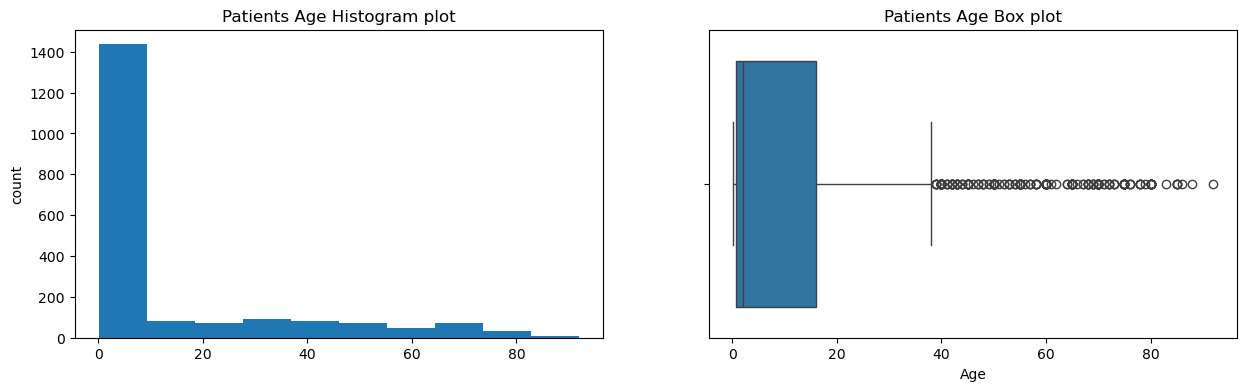

In [18]:
for col in flo_cols:
    print(col)
    print('Skew :', round(ILIdata[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    ILIdata[col].hist(grid=False)
    plt.ylabel('count')
    plt.title('Patients Age Histogram plot')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=ILIdata[col])
    plt.title('Patients Age Box plot')
   # plt.subplot(1,2,3)
    #stats.probplot(x=ILIdata[col], dist='norm', plot=plt)
    #plt.title('Age QQ Plot')
    plt.show()

In [19]:
ILIdata.columns           

Index(['Sex', 'Age', 'Cough', 'Temprature', 'Headache', 'Skin_rash',
       'runny_nose', 'sorthroat', 'Hemoptysis', 'Breathing', 'Arthritis',
       'Vomiting', 'Covid_19_result', 'Sex_n', 'Cough_n', 'Temprature_n',
       'Headache_n', 'Skin_rash_n', 'runny_nose_n', 'sorthroat_n',
       'Hemoptysis_n', 'Breathing_n', 'Arthritis_n', 'Vomiting_n',
       'Covid_19_result_n'],
      dtype='object')

In [20]:
Feature=['Sex_n', 'Cough_n', 'Temprature_n', 'Headache_n', 'Skin_rash_n',
       'runny_nose_n', 'sorthroat_n', 'Hemoptysis_n', 'Breathing_n',
       'Arthritis_n', 'Vomiting_n']

In [21]:
list(enumerate(Feature))

[(0, 'Sex_n'),
 (1, 'Cough_n'),
 (2, 'Temprature_n'),
 (3, 'Headache_n'),
 (4, 'Skin_rash_n'),
 (5, 'runny_nose_n'),
 (6, 'sorthroat_n'),
 (7, 'Hemoptysis_n'),
 (8, 'Breathing_n'),
 (9, 'Arthritis_n'),
 (10, 'Vomiting_n')]

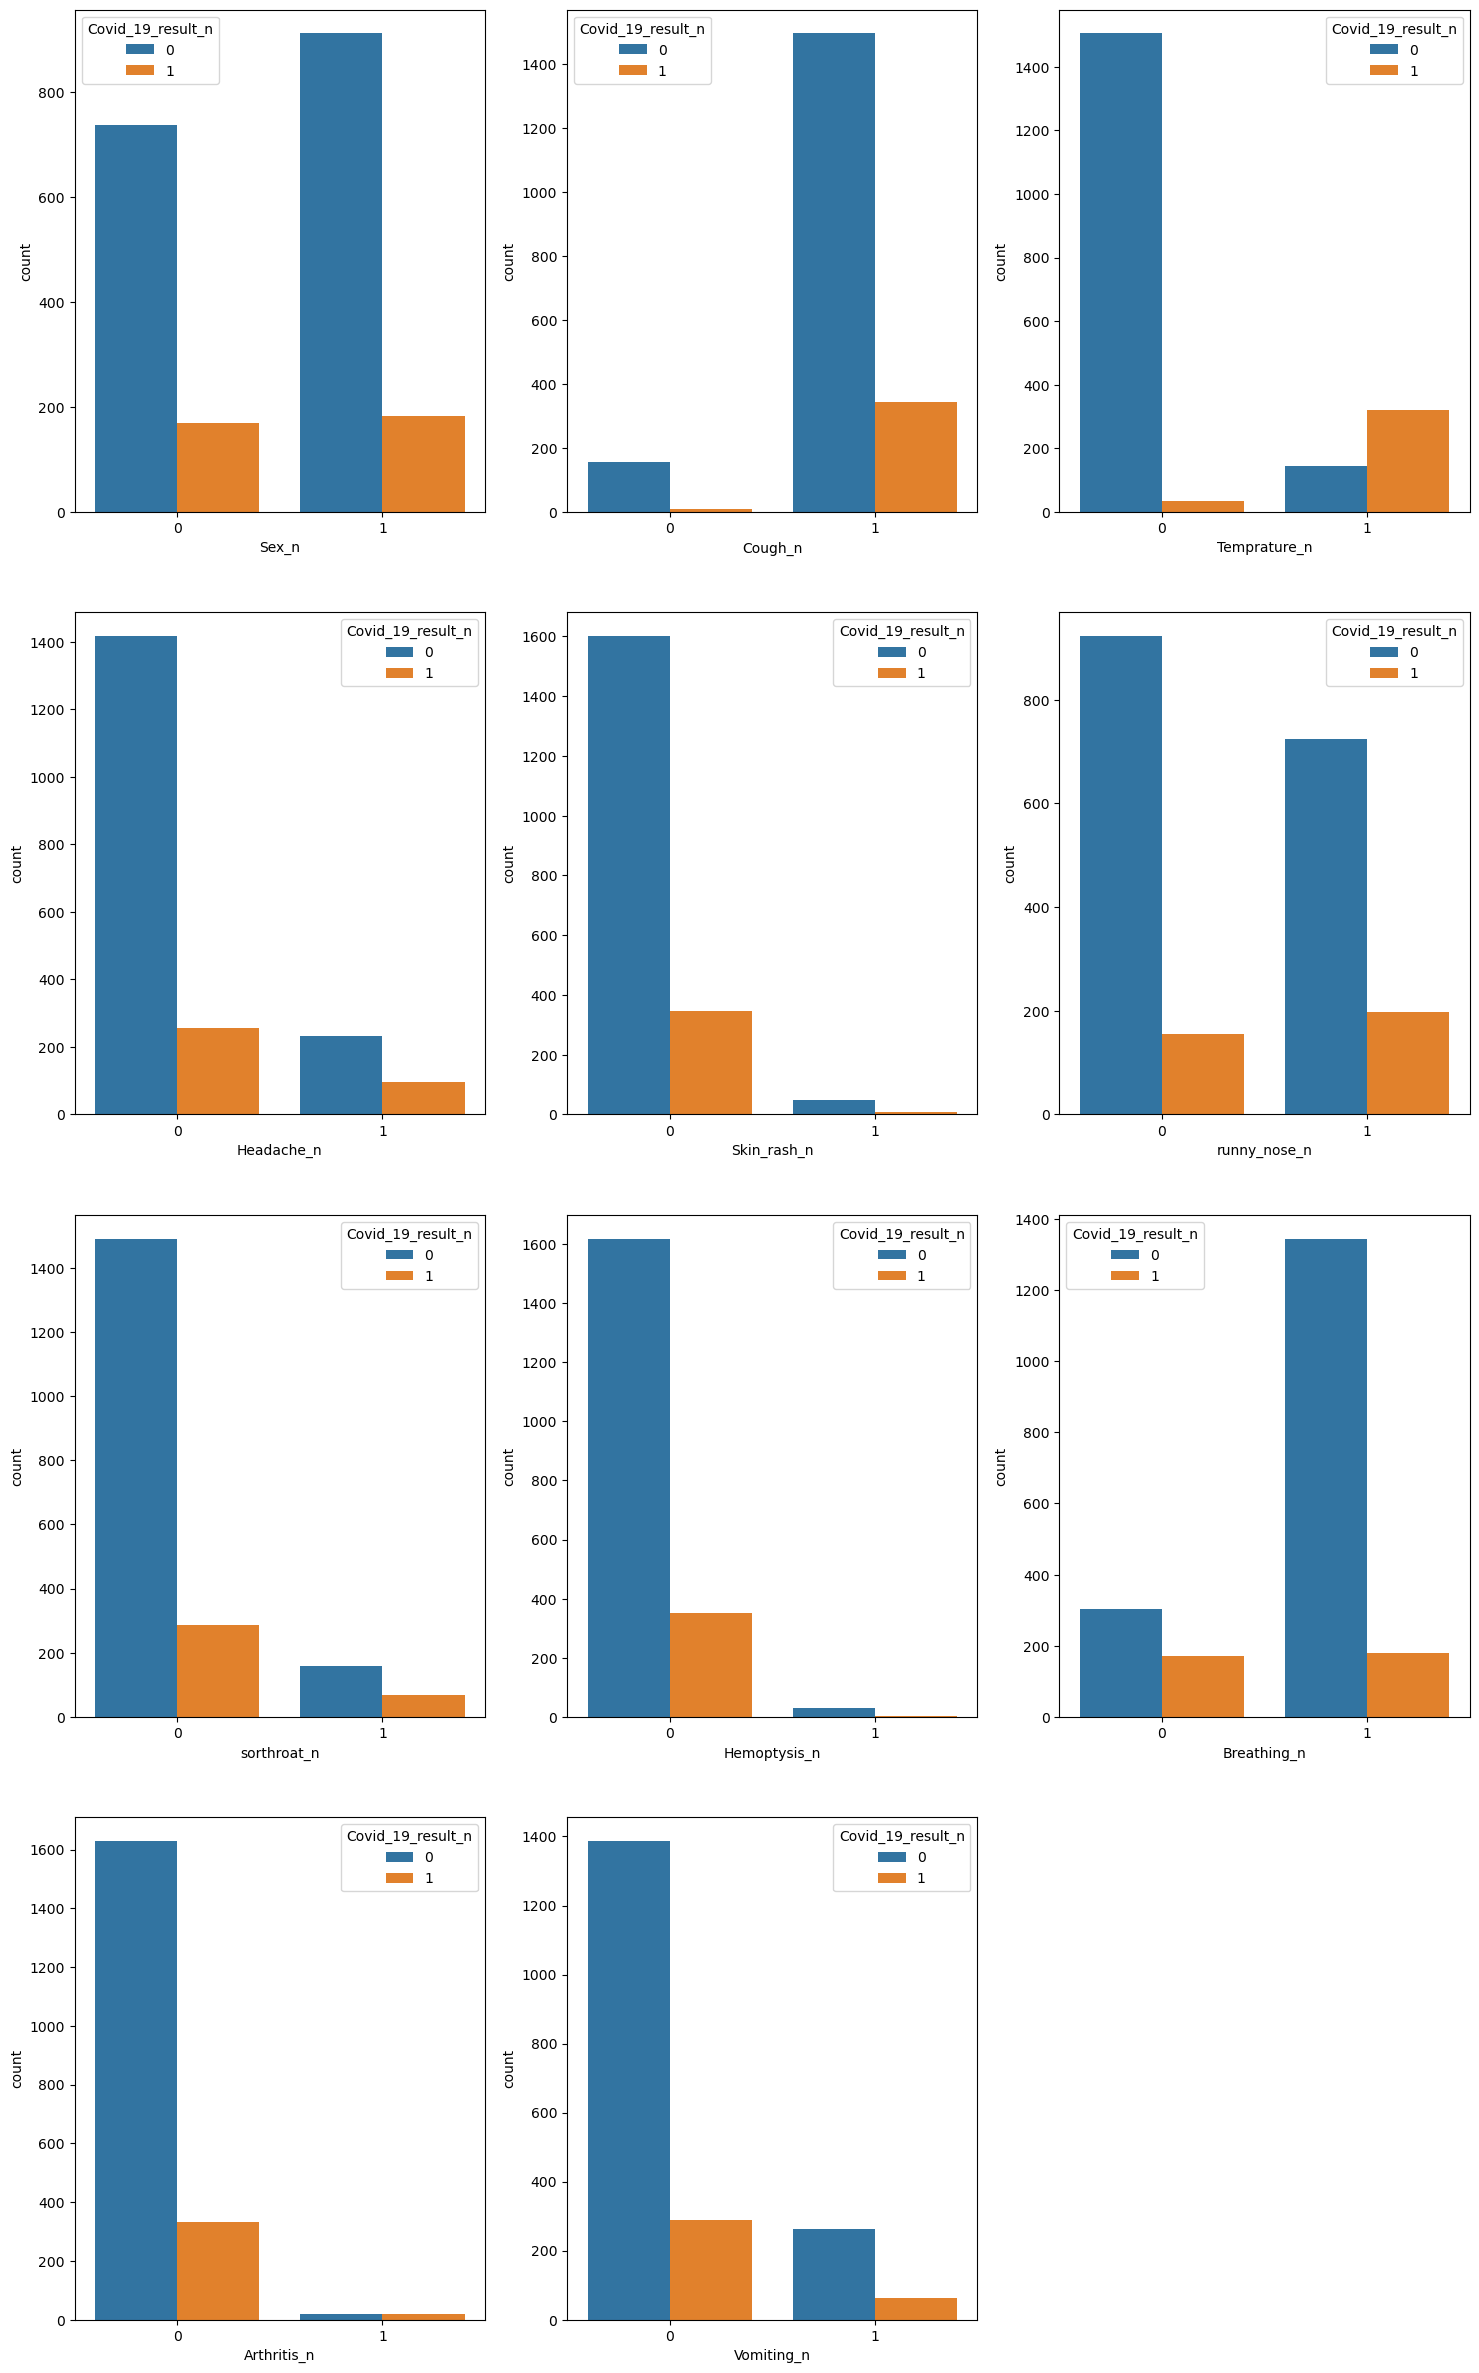

In [22]:
plt.figure(figsize=(18,30))
for i, feature in enumerate(Feature):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=feature, hue='Covid_19_result_n', data=ILIdata)

## Splitting the Data-Set into Training Set and Test Set

In [23]:
#define X variables and our target(y)
x = ILIdata[Feature]  
y = ILIdata['Covid_19_result_n'].values

## Standardize features

In [24]:
scaled_dataX=StandardScaler().fit_transform(x)
scaled_dataX

array([[-1.09825962, -3.35798654, -0.54790048, ..., -1.78991103,
        -0.14282071, -0.44035677],
       [-1.09825962,  0.2977975 ,  1.82514899, ...,  0.55868699,
        -0.14282071, -0.44035677],
       [ 0.91053152,  0.2977975 , -0.54790048, ...,  0.55868699,
        -0.14282071, -0.44035677],
       ...,
       [ 0.91053152,  0.2977975 , -0.54790048, ...,  0.55868699,
        -0.14282071,  2.27088597],
       [-1.09825962,  0.2977975 ,  1.82514899, ...,  0.55868699,
        -0.14282071, -0.44035677],
       [ 0.91053152,  0.2977975 , -0.54790048, ..., -1.78991103,
        -0.14282071, -0.44035677]])

In [25]:
#split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_dataX, y, test_size=0.25, random_state=42)

## Random Forest ML model 

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=rf.predict(X_test)

In [28]:
#Let’s test the performance of our model – roc_auc curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc : ", roc_auc)

roc_auc :  0.8824145759357355


In [29]:
#Let’s test the performance of our model – Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[392  27]
 [ 14  68]]


## More Model evaluation metrics

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Print the model performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9181636726546906
Precision: 0.7157894736842105
Recall: 0.8292682926829268
F1 Score: 0.768361581920904


In [36]:
# Get the feature importances
importances = rf.feature_importances_

# Assuming rf.feature_names is your list of feature names
features = Feature
# Create a DataFrame with features and their corresponding importances
importance_df = pd.DataFrame(zip(features, importances), columns=['Features', 'Importances'])

# Display the DataFrame
print(importance_df)

        Features  Importances
0          Sex_n     0.025635
1        Cough_n     0.007453
2   Temprature_n     0.750651
3     Headache_n     0.030059
4    Skin_rash_n     0.008571
5   runny_nose_n     0.039625
6    sorthroat_n     0.026643
7   Hemoptysis_n     0.009792
8    Breathing_n     0.072686
9    Arthritis_n     0.013351
10    Vomiting_n     0.015534


## Support Vector Machine Algorithm

In [40]:
#define X variables and our target(y)
xs = ILIdata[Feature]  
ys = ILIdata['Covid_19_result_n'].values 

## Standardize features

In [41]:
scaled_dataXs=StandardScaler().fit_transform(xs)
scaled_dataXs

array([[-1.09825962, -3.35798654, -0.54790048, ..., -1.78991103,
        -0.14282071, -0.44035677],
       [-1.09825962,  0.2977975 ,  1.82514899, ...,  0.55868699,
        -0.14282071, -0.44035677],
       [ 0.91053152,  0.2977975 , -0.54790048, ...,  0.55868699,
        -0.14282071, -0.44035677],
       ...,
       [ 0.91053152,  0.2977975 , -0.54790048, ...,  0.55868699,
        -0.14282071,  2.27088597],
       [-1.09825962,  0.2977975 ,  1.82514899, ...,  0.55868699,
        -0.14282071, -0.44035677],
       [ 0.91053152,  0.2977975 , -0.54790048, ..., -1.78991103,
        -0.14282071, -0.44035677]])

In [42]:
#split Train and Test
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(scaled_dataXs, ys, test_size=0.25, random_state=24)

In [43]:
X_trains.shape

(1500, 11)

In [44]:
from sklearn.svm import SVC

In [45]:
sv=SVC()
sv.fit(X_trains,y_trains)

SVC()

In [46]:
sv_pred=sv.predict(X_tests)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_tests, sv_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc : ", roc_auc)

roc_auc :  0.8670921333074986


In [47]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_tests, sv_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[364  33]
 [ 19  85]]


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_tests, y_pred)
precision = precision_score(y_tests, sv_pred, pos_label=1)
recall = recall_score(y_tests, sv_pred, pos_label=1)
f1 = f1_score(y_tests, sv_pred, pos_label=1)

# Print the model performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6826347305389222
Precision: 0.7203389830508474
Recall: 0.8173076923076923
F1 Score: 0.7657657657657657


## Decision Tree Classification machine learning Algorism

In [ ]:
#define X variables and our target(y)
xd = ILIdata[Feature]  
yd = ILIdata['Covid_19_result_n'].values 

In [ ]:
scaled_dataXd=StandardScaler().fit_transform(xd)
scaled_dataXd

array([[-1.09825962, -3.35798654, -0.54790048, ..., -1.78991103,
        -0.14282071, -0.44035677],
       [-1.09825962,  0.2977975 ,  1.82514899, ...,  0.55868699,
        -0.14282071, -0.44035677],
       [ 0.91053152,  0.2977975 , -0.54790048, ...,  0.55868699,
        -0.14282071, -0.44035677],
       ...,
       [ 0.91053152,  0.2977975 , -0.54790048, ...,  0.55868699,
        -0.14282071,  2.27088597],
       [-1.09825962,  0.2977975 ,  1.82514899, ...,  0.55868699,
        -0.14282071, -0.44035677],
       [ 0.91053152,  0.2977975 , -0.54790048, ..., -1.78991103,
        -0.14282071, -0.44035677]])

In [ ]:
#split Train and Test
from sklearn.model_selection import train_test_split
X_traind, X_testd, y_traind, y_testd = train_test_split(scaled_dataXd, yd, test_size=0.25, random_state=42)

In [ ]:
X_traind.shape

(1500, 11)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='gini',
                          max_depth=7,
                          min_samples_split=9,
                          random_state=10)

In [ ]:
DTC.fit(X_traind,y_traind)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=10)

In [ ]:
yd_pred=DTC.predict(X_testd)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_testd, yd_pred)
auc_DT = auc(false_positive_rate, true_positive_rate)

print("roc_auc : ", roc_auc)

roc_auc :  0.8670921333074986


In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_testd, yd_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[390  29]
 [ 11  71]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_testd, yd_pred)
precision = precision_score(y_testd, yd_pred, pos_label=1)
recall = recall_score(y_testd, yd_pred, pos_label=1)
f1 = f1_score(y_testd, yd_pred, pos_label=1)
# Print the model performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9201596806387226
Precision: 0.71
Recall: 0.8658536585365854
F1 Score: 0.7802197802197802


In [ ]:
sv_predau=sv.decision_function(X_tests)

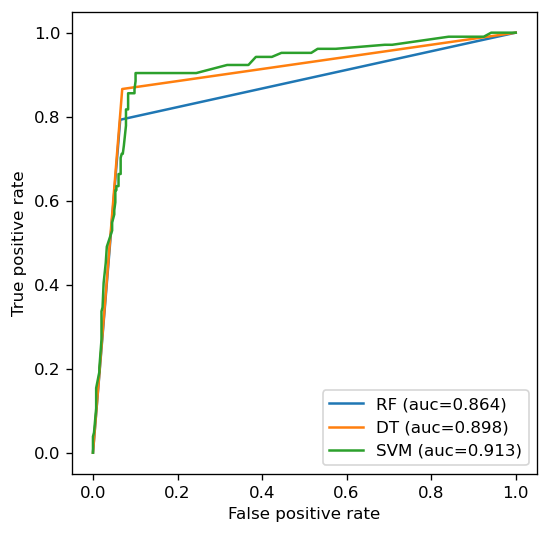

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rateRF, true_positive_rateRF, thresholds = roc_curve(y_test, y_pred)
auc_RF = auc(false_positive_rateRF, true_positive_rateRF)

false_positive_rateDT, true_positive_rateDT, thresholds = roc_curve(y_testd, yd_pred)
auc_DT = auc(false_positive_rateDT, true_positive_rateDT)

svm_fpr,svm_tpr, thresholds = roc_curve(y_tests, sv_predau)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5,5), dpi=120)
plt.plot(false_positive_rateRF, true_positive_rateRF, linestyle='-', label='RF (auc=%0.3f)' %auc_RF)
plt.plot(false_positive_rateDT, true_positive_rateDT, linestyle='-', label='DT (auc=%0.3f)' %auc_DT)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc=%0.3f)' %auc_svm)


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()
plt.show()